# Q1 a

In [4]:
# %load_ext autoreload
# %autoreload 2

# adding relavent directory in includes
import sys
dirr = "../../src"
if dirr not in sys.path:
    sys.path.append(dirr)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from knn import KNNClassifier
from utils import train_timer
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [5]:
data = pd.read_csv("../../data/iris/iris.csv")
data.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
knns = KNNClassifier()
knns.train(data.iloc[:, :-1].values, data.iloc[:, -1].values)
y_pred = knns.predict(data.iloc[:, :-1].values)
corr = np.sum(y_pred == data.iloc[:, -1].values)
print ('acc:', corr / len(y_pred))

acc: 0.9798657718120806


# Q1 b

In [7]:
samples = [2 ** i for i in range(2, 14)]
features = [2 ** i for i in range(2, 14)]
k = 3
dist_metric = 'euclidian'

train_vals = []
test_vals = []

for i, sample in enumerate(samples):
    for j, feature in enumerate(features):
        y = np.zeros(sample)
        x = np.random.rand(sample, feature)
        model = KNNClassifier(k = 2, dist_metric='euclidian')
        train_vals.append((i, j, train_timer(model.train, X=x, y=y)))
        
        x_test = np.random.rand(2, feature)
        test_vals.append((i, j, train_timer(model.predict, X_test=x_test)))

# print (train_vals)
# print (test_vals)

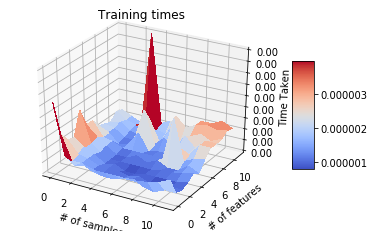

In [8]:
# Taken from https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
x, y, z = zip(*train_vals)
xyz = {'x': x, 'y': y, 'z': z}

df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('# of samples')
ax.set_ylabel('# of features')
ax.set_zlabel('Time Taken')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Training times')

plt.show()

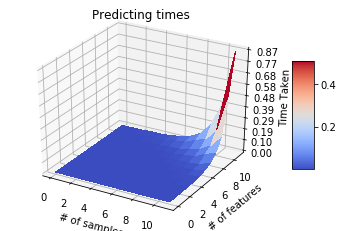

In [9]:
# Taken from https://stackoverflow.com/questions/9170838/surface-plots-in-matplotlib
import pandas as pd
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
x, y, z = zip(*test_vals)
xyz = {'x': x, 'y': y, 'z': z}

df = pd.DataFrame(xyz, index=range(len(xyz['x']))) 

x1 = np.linspace(df['x'].min(), df['x'].max(), len(df['x'].unique()))
y1 = np.linspace(df['y'].min(), df['y'].max(), len(df['y'].unique()))
x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['x'], df['y']), df['z'], (x2, y2), method='cubic')

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x2, y2, z2, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('# of samples')
ax.set_ylabel('# of features')
ax.set_zlabel('Time Taken')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Predicting times')

plt.show()

The theoretical running time complexity for:

- Training: $O(const)$

- Predicting: $O(k \times n \times m)$

Where $n$ is the number of samples, and $m$ is the number of features.

The resulting plots obtained above seem by the theoretical complexities. Although we see training time seems to increase, this is because the time taken to save n is not constant, due to implementation details. Also we notice that we get spikes due to other factors like background processes affecting the timings here.

# Q2

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
tupl = train_test_split(X, y)
X_train, X_test, y_train, y_test = tupl
X_train.head(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
197,2013.250000,34.4,126.7286,8,24.96881,121.54089
407,2013.000000,5.2,2408.9930,0,24.95505,121.55964
316,2013.250000,13.3,250.6310,7,24.96606,121.54297
265,2012.833333,15.7,815.9314,4,24.97886,121.53464
128,2013.083333,41.3,124.9912,6,24.96674,121.54039


In [27]:
from utils import rmse
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
corr = rmse(y_pred, y_test.values)
print ('rmse:', corr / len(y_pred))

rmse: 0.09131790455606167


# Q2 a

In [52]:
from sklearn.utils import shuffle

def cross(dTrain, depths, num_valid, clf):
    folds = make_folds(dTrain, num_valid)
    passed_folds = folds[:-1] # holding out test
    k, acc= best_k(passed_folds, depths, clf)
    acc = 0
    curr_fold_train = folds[:-1]
    curr_fold_train = pd.concat(curr_fold_train)
    curr_fold_test = folds[-1]
    linear_reg = clf(n_neighbors=k)
    linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
    my_preds = linear_reg.predict(curr_fold_test.iloc[:, :-1])
    true = curr_fold_test.iloc[:, -1].values
    my_acc = rmse(true, my_preds)
    return {"n_neighbors": k, "TEST rmse": my_acc}   

def make_folds(dTrain, num_valid):
    '''Make a number of folds with diven pd'''
    train = shuffle(dTrain)
    last = train.shape[0]
    folds = []
    for i in range(num_valid):
        start = i*int(last/num_valid)
        end = (i+1)*int(last/num_valid)
        if end >= last:
            end = -1
        folds.append(train.iloc[start:end, :])
    return folds

def best_k(folds, depths, clf):
    '''return lambda that maximizes the avg accuracy'''
    num_valid = len(folds)
    acc = {}
    train_acc = {}
    for i in range(num_valid):
        curr_fold_train = [x for j,x in enumerate(folds) if j!=i] 
        curr_fold_validation = folds[i]
        curr_fold_train = pd.concat(curr_fold_train)
        for k in depths:
            linear_reg = clf(n_neighbors=k)
            linear_reg.fit(curr_fold_train.iloc[:, :-1], curr_fold_train.iloc[:, -1])
            my_preds = linear_reg.predict(curr_fold_validation.iloc[:, :-1])
            true = curr_fold_validation.iloc[:, -1].values
            my_acc = rmse(true, my_preds)
            acc[k] = my_acc
            
            my_preds = linear_reg.predict(curr_fold_train.iloc[:, :-1])
            true = curr_fold_train.iloc[:, -1].values
            train_acc = rmse(true, my_preds)
            
            print(k, "| validation rmse: %8.2f"% my_acc) # for showcasing
            print(k, "| train rmse: %8.2f"% train_acc) # for showcasing
    acc = {k: acc[k] for k in acc.keys()}
    
    x = acc
    sorted_by_value = sorted(x.items(), key=lambda kv: kv[1])
    return sorted([x[0] for x in sorted_by_value if sorted_by_value[0][1] == x[1]])[0], acc

In [76]:
k_to_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12, 14, 15]
cross_vals = 5
acsc = cross(data, k_to_test, cross_vals, KNeighborsRegressor)

1 | validation rmse:    14.04
1 | train rmse:     0.00
2 | validation rmse:    13.92
2 | train rmse:     4.64
3 | validation rmse:    13.22
3 | train rmse:     5.45
4 | validation rmse:    12.36
4 | train rmse:     6.08
5 | validation rmse:    12.09
5 | train rmse:     6.20
6 | validation rmse:    11.67
6 | train rmse:     6.46
7 | validation rmse:    11.96
7 | train rmse:     6.60
8 | validation rmse:    11.84
8 | train rmse:     6.80
9 | validation rmse:    11.72
9 | train rmse:     6.88
10 | validation rmse:    11.70
10 | train rmse:     6.96
12 | validation rmse:    11.65
12 | train rmse:     7.12
14 | validation rmse:    11.68
14 | train rmse:     7.18
15 | validation rmse:    11.70
15 | train rmse:     7.20
1 | validation rmse:     9.58
1 | train rmse:     0.00
2 | validation rmse:     9.79
2 | train rmse:     6.20
3 | validation rmse:     9.05
3 | train rmse:     7.35
4 | validation rmse:     8.63
4 | train rmse:     7.48
5 | validation rmse:     8.28
5 | train rmse:     7.75
6 

In [77]:
print ('best among the set')
print(acsc)

best among the set
{'n_neighbors': 6, 'TEST rmse': 9.125369651346336}


# Q2 b
Now the features were not in the same scale in the above solution. This would definelty affect the performance of the Regressor as the distances between points can be changed drastically by choosing different units for each of the axis.

In [94]:
from sklearn.preprocessing import MinMaxScaler
data_loc = "../../data/real_estate/dataset.xlsx"
data = pd.read_excel(data_loc)
X = data.iloc[:, 1:-1]
y = data.iloc[:, -1]
# scaling the features
scaler = MinMaxScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

/home/apoorv/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [100]:
k_to_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12, 14, 15]
cross_vals = 5
new_data = pd.concat([X, y], axis=1)
acsc = cross(new_data, k_to_test, cross_vals, KNeighborsRegressor)

1 | validation rmse:    11.34
1 | train rmse:     0.54
2 | validation rmse:    11.79
2 | train rmse:     5.59
3 | validation rmse:    11.44
3 | train rmse:     6.53
4 | validation rmse:    11.22
4 | train rmse:     6.92
5 | validation rmse:    11.06
5 | train rmse:     7.03
6 | validation rmse:    11.00
6 | train rmse:     7.08
7 | validation rmse:    10.95
7 | train rmse:     7.27
8 | validation rmse:    11.02
8 | train rmse:     7.41
9 | validation rmse:    11.07
9 | train rmse:     7.58
10 | validation rmse:    11.25
10 | train rmse:     7.76
12 | validation rmse:    11.24
12 | train rmse:     7.95
14 | validation rmse:    11.35
14 | train rmse:     8.09
15 | validation rmse:    11.32
15 | train rmse:     8.23
1 | validation rmse:     8.45
1 | train rmse:     0.25
2 | validation rmse:    10.73
2 | train rmse:     6.43
3 | validation rmse:     8.86
3 | train rmse:     7.09
4 | validation rmse:     7.61
4 | train rmse:     7.65
5 | validation rmse:     6.93
5 | train rmse:     8.00
6 

In [101]:
print ('best among the set')
print(acsc)

best among the set
{'n_neighbors': 5, 'TEST rmse': 7.021402820019344}


# Q2 c

In [104]:
k_to_test = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,12, 14, 15, 20, 25, 30, 35]
tupl = train_test_split(new_data, test_size=.2)
data_train, data_test = tupl

In [106]:
X_train = data_train.iloc[:, :-1]
y_train = data_train.iloc[:, -1]
X_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, -1]

In [121]:
accs = []
accss = []
for k in k_to_test:
    nn = KNeighborsRegressor(n_neighbors=k)
    nn.fit(X_train, y_train)
    y_train_pred = nn.predict(X_train)
    accss.append(rmse(y_train_pred, y_train.values))
    y_pred = nn.predict(X_test)
    accs.append(rmse(y_pred, y_test.values))

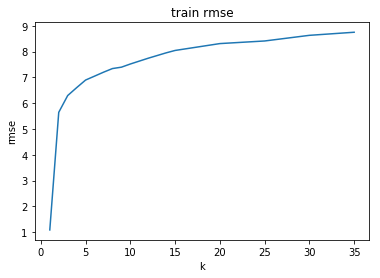

In [122]:
plt.plot(k_to_test, accss)
plt.xlabel('k')
plt.ylabel('rmse')
plt.title('train rmse')
plt.show()

In the case of training, when we try to predict a point that is already in the training set. Thus, the prediction can be directly returned as the original point's `y` value (i.e. we get a very high accuracy | `rmse` = 0).

Now once we start to increase the value of `k` the predicition that is returned is a `weighted mean` (can also be normal `mean`) of the `k` closest points. Now since all these `k` points can't be same all the time, we would recive a predicition that is not exactly as the original prediction, therefore we get higher `rmse`. Increasing the number `k` would lead to more number of points being averaged and therefore the decrease it the accuracy (increasing rmse).

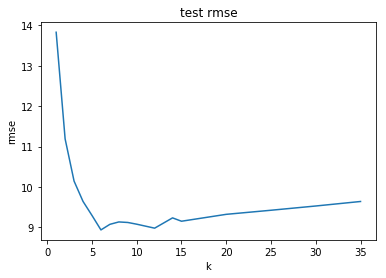

In [123]:
plt.plot(k_to_test, accs)
plt.xlabel('k')
plt.ylabel('rmse')
plt.title('test rmse')
plt.show()

We see that, initially we have a increase in accuracy (decrease in rmse) due to better **generalization** as we are taking multiple values and averaging the results that are closest to the given test points. i.e. Initially we were having **high variance (overfitting)** in the model and increasing the value of `k` leads to better fitting. 

After a minima, we see that our Regressors accuracy goes on decreasing (rmse increases) as the critical point has been crossed and the Regressor is becoming more **baised** and **underfitted** and if we keep on increasing the value of `k`, any sample would be predicted as the average of the whole data.

# Q2 c i

In [114]:
nn = KNeighborsRegressor(n_neighbors=6) # we take 6 as it got us best rmse
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
a = np.argmax(y_pred - y_test.values)
print ('the {}th home gave us the worst rmse'.format(a))

the 9th home gave us the worst rmse


In [115]:
print (X_test.iloc[9, :])

X1 transaction date                       0.818182
X2 house age                              0.301370
X3 distance to the nearest MRT station    0.022700
X4 number of convenience stores           0.100000
X5 latitude                               0.504605
X6 longitude                              0.607181
Name: 273, dtype: float64


In [116]:
print (X_test.iloc[0, :])

X1 transaction date                       0.454545
X2 house age                              0.470320
X3 distance to the nearest MRT station    0.110530
X4 number of convenience stores           0.200000
X5 latitude                               0.591978
X6 longitude                              0.796420
Name: 115, dtype: float64


In [117]:
print (X_test.iloc[4, :])

X1 transaction date                       0.909091
X2 house age                              0.127854
X3 distance to the nearest MRT station    0.369025
X4 number of convenience stores           0.000000
X5 latitude                               0.278478
X6 longitude                              0.928510
Name: 359, dtype: float64


The reason that this home gave us the worse rmse could be multiple based on the data, as we are not able to visualize the data, we currently with the given knowledge can't pinpoint exact reason for the erronous behaviour. What we can say is that this home might be noisy (given features are not able to correlate to the high difference in the price). To improve the rmse error on this house we can try to use different units (scaling factors) for the features rather than scaling them to be same.

According to me scaling all the features to the same scale is not such a great idea because, effectively we are saying that all the features matter the same (because if a differance of $\delta_1$ in `feature1` is compared to the difference of $\delta_2$ in `feature2` both would result in increase or decrease in distance between points if the environments remain exactly the same). This can't be said as there could be some features that affect the price more than the others. A naive made-up example could be `feature1 = #of cows in a farm 5 kms from house` and `feature2 = sq. ft. area of the house`, clearly if `feature1` is given equal importance as `feature2` we would not be getting good results.

# Q3
-- citations: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html

In [19]:
# points = 

In [ ]:
# points = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2],
#                    [2, 0], [2, 1], [2, 2]])
# from scipy.spatial import Voronoi, voronoi_plot_2d
# vor = Voronoi(points)

In [ ]:
# import matplotlib.pyplot as plt
# voronoi_plot_2d(vor)
# plt.show()